In [1]:
# -*- coding: utf-8 -*-
"""Mutual information.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1lcWj22Aj1Kaf52sS4cZhD3ylRP9msCSH
"""

from __future__ import print_function  # print('me') instead of print 'me'
from __future__ import division  # 1/2 == 0.5, not 0



In [2]:
import numpy as np  # the Python array package
import matplotlib.pyplot as plt



In [3]:
plt.rcParams['image.cmap'] = 'BrBG'
plt.rcParams['image.interpolation'] = 'nearest'



In [5]:
import nibabel as nib
import cv2
t1_img =cv2.imread('/content/drive/MyDrive/dataset-new/100-chinesdataset/josson/59_1.jpg')
t2_img =cv2.imread('/content/drive/MyDrive/dataset-new/100-chinesdataset/josson/59_100.jpg')



Text(0.5, 1.0, 'T2 slice histogram')

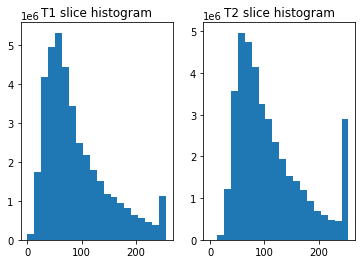

In [6]:

ig, axes = plt.subplots(1, 2)
axes[0].hist(t1_img.ravel(), bins=20)

axes[0].set_title('T1 slice histogram')

axes[1].hist(t2_img.ravel(), bins=20)

axes[1].set_title('T2 slice histogram')


0.0935674377720855

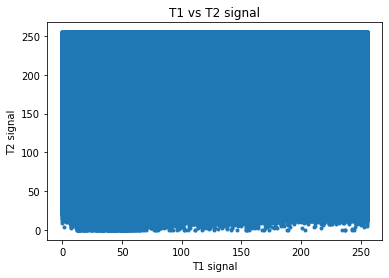

In [7]:

plt.plot(t1_img.ravel(), t2_img.ravel(), '.')

plt.xlabel('T1 signal')

plt.ylabel('T2 signal')

plt.title('T1 vs T2 signal')

np.corrcoef(t1_img.ravel(), t2_img.ravel())[0, 1]



Text(0, 0.5, 'T2 signal bin')

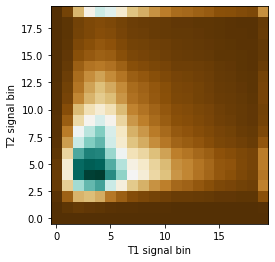

In [8]:
import matplotlib.pyplot as plt
hist_2d, x_edges, y_edges = np.histogram2d(
     t1_img.ravel(),
     t2_img.ravel(),
     bins=20)
plt.imshow(hist_2d.T, origin='lower')

plt.xlabel('T1 signal bin')
plt.ylabel('T2 signal bin')



Text(0, 0.5, 'T2 signal bin')

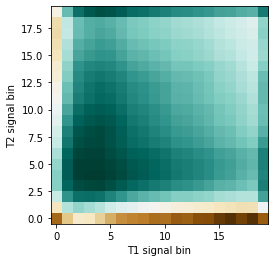

In [9]:
# Show log histogram, avoiding divide by 0
hist_2d_log = np.zeros(hist_2d.shape)
non_zeros = hist_2d != 0
hist_2d_log[non_zeros] = np.log(hist_2d[non_zeros])
plt.imshow(hist_2d_log.T, origin='lower')

plt.xlabel('T1 signal bin')

plt.ylabel('T2 signal bin')


In [10]:

def mutual_information(hgram):
   pxy = hgram / float(np.sum(hgram))
   px = np.sum(pxy, axis=1) # marginal for x over y
   py = np.sum(pxy, axis=0) # marginal for y over x
   px_py = px[:, None] * py[None, :] # Broadcast to multiply marginals
# Now we can do the calculation using the pxy, px_py 2D arrays
   nzs = pxy > 0 # Only non-zero pxy values contribute to the sum
   return np.sum(pxy[nzs] * np.log(pxy[nzs] / px_py[nzs]))

mutual_information(hist_2d)

0.011705626590751207